In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
data = pd.read_csv('./automobile_stocks.csv')  

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')

In [4]:
unique_stock_names = data['Stock Name'].unique()

In [5]:
model = IsolationForest(contamination=0.05, random_state=42)

In [6]:
anomalies_info = {}

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


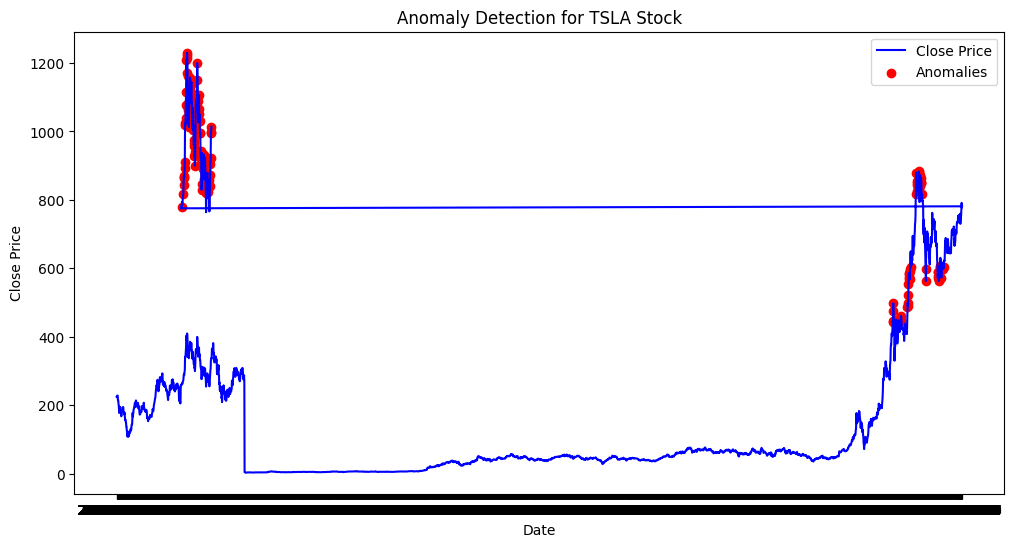

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


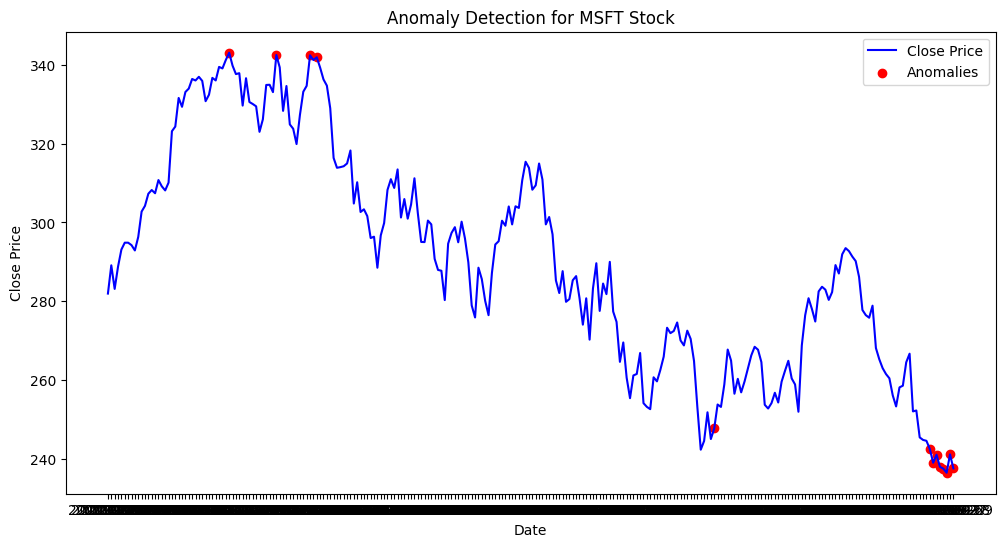

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


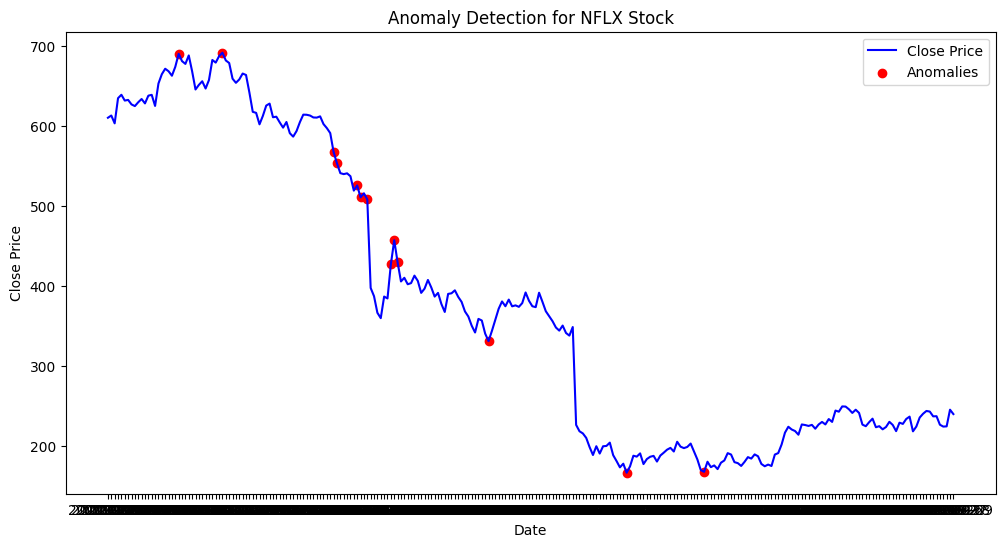

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


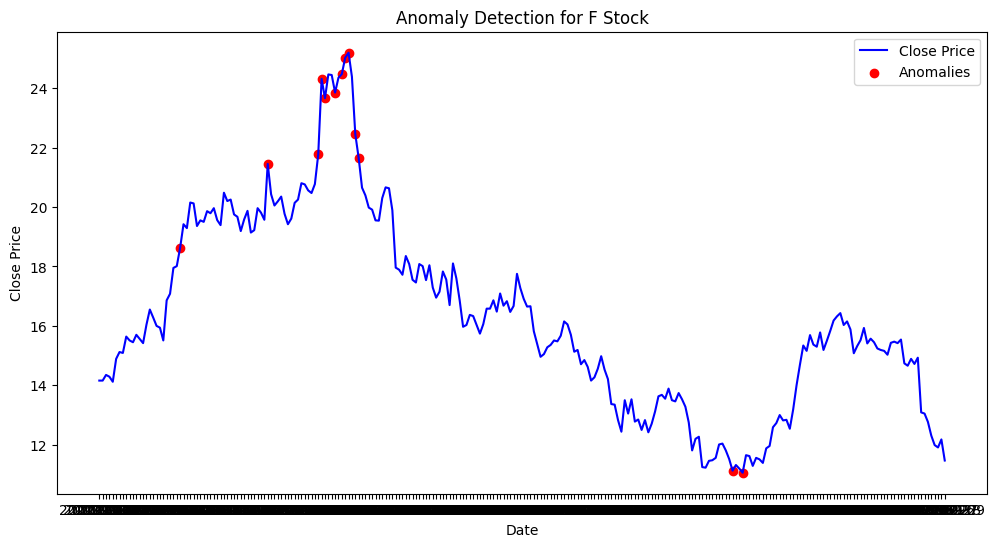

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


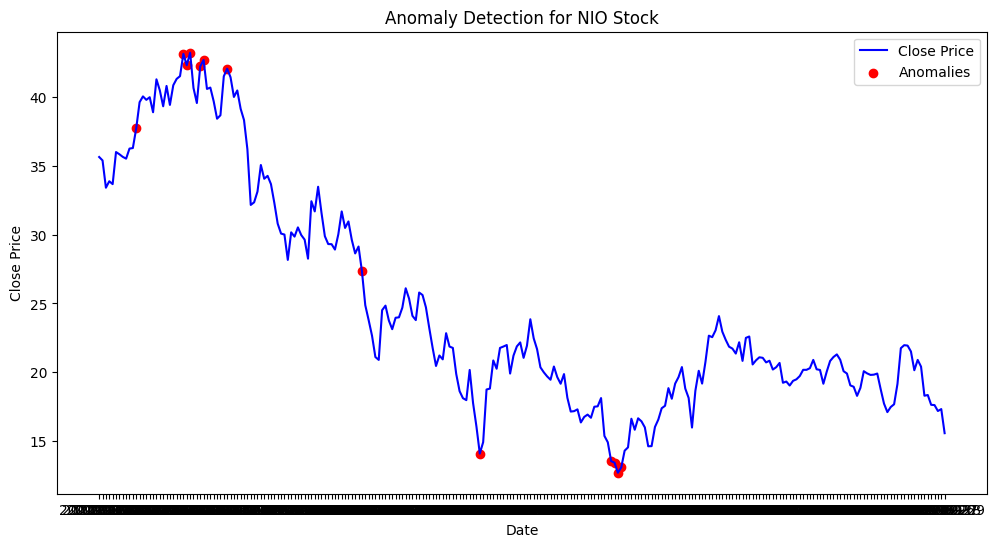

C:\Users\danus\AppData\Local\Temp\ipykernel_2668\134638436.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Anomaly'] = anomaly_predictions


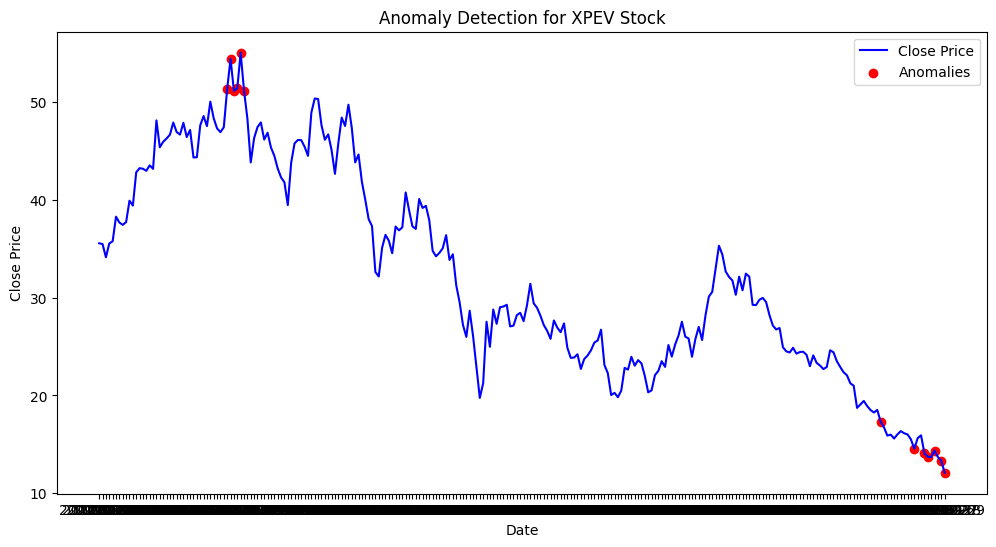

In [7]:
for stock_name in unique_stock_names:
    stock_data = data[data['Stock Name'] == stock_name]
    
    close_prices = stock_data['Close'].values.reshape(-1, 1)
    model.fit(close_prices)

    anomaly_predictions = model.predict(close_prices)

    stock_data['Anomaly'] = anomaly_predictions

    anomalies_info[stock_name] = {
        'Date': stock_data['Date'][anomaly_predictions == -1],
        'Close Price': stock_data['Close'][anomaly_predictions == -1]
    }

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    plt.scatter(stock_data['Date'][anomaly_predictions == -1], stock_data['Close'][anomaly_predictions == -1], color='red', label='Anomalies')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Anomaly Detection for {stock_name} Stock')
    plt.legend()
    plt.show()


In [8]:
for stock_name, info in anomalies_info.items():
    print(f'Anomalies for {stock_name} stock:')
    anomalies_df = pd.DataFrame(info)
    print(anomalies_df)
    print("\n")

Anomalies for TSLA stock:
            Date  Close Price
4326  2020-08-27   447.750000
4327  2020-08-28   442.679993
4328  2020-08-31   498.320007
4329  2020-09-01   475.049988
4330  2020-09-02   447.369995
...          ...          ...
4718  2022-03-18   905.390015
4719  2022-03-21   921.159973
4720  2022-03-22   993.979980
4721  2022-03-23   999.109985
4722  2022-03-24  1013.919983

[173 rows x 2 columns]


Anomalies for MSFT stock:
           Date  Close Price
543  2021-11-19   343.109985
557  2021-12-10   342.540009
567  2021-12-27   342.450012
569  2021-12-29   341.950012
687  2022-06-17   247.649994
751  2022-09-20   242.449997
752  2022-09-21   238.949997
753  2022-09-22   240.979996
754  2022-09-23   237.919998
755  2022-09-26   237.449997
756  2022-09-27   236.410004
757  2022-09-28   241.070007
758  2022-09-29   237.500000


Anomalies for NFLX stock:
           Date  Close Price
780  2021-10-29   690.309998
793  2021-11-17   691.690002
826  2022-01-05   567.520020
827  2022-01

In [9]:
for stock_name, info in anomalies_info.items():
    anomalies_df = pd.DataFrame(info)
    anomalies_df.to_csv(f'anomalies_{stock_name}.csv', index=False)

Anomalies for TSLA stock:
Summary Statistics for TSLA:
count     173.000000
mean      857.166067
std       212.291710
min       442.299988
25%       605.130005
50%       879.890015
75%      1024.859985
max      1229.910034
Name: Close Price, dtype: float64


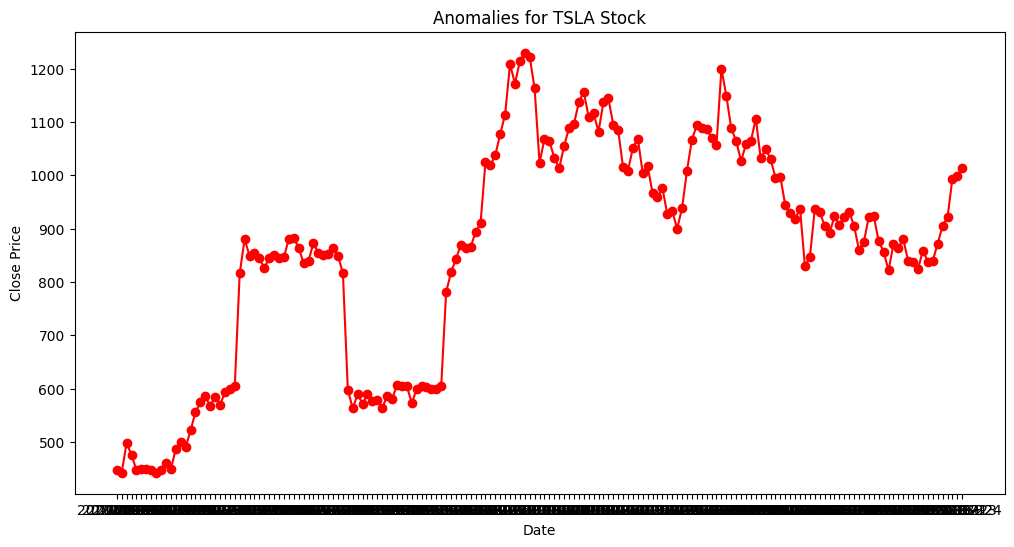



Anomalies for MSFT stock:
Summary Statistics for MSFT:
count     13.000000
mean     271.571539
std       49.308320
min      236.410004
25%      237.919998
50%      241.070007
75%      341.950012
max      343.109985
Name: Close Price, dtype: float64


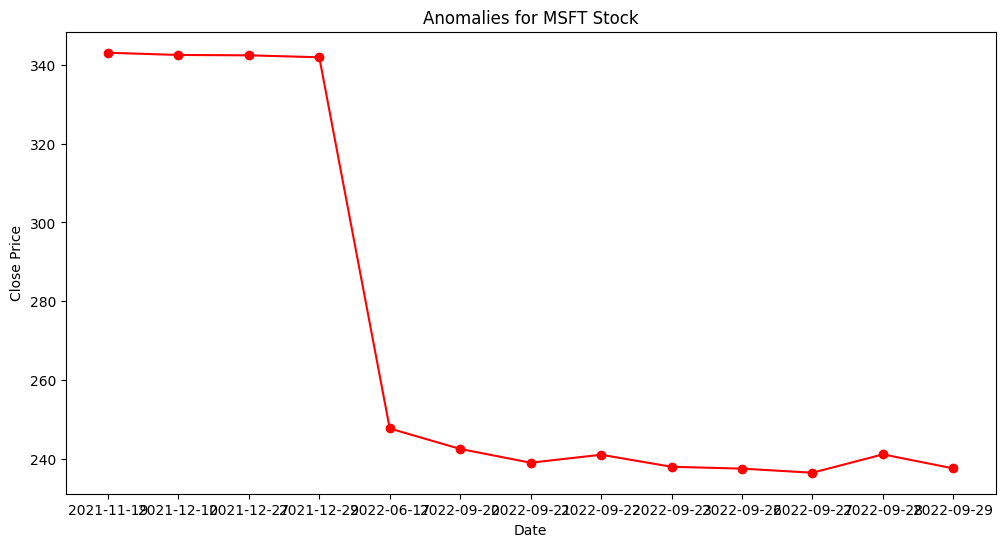



Anomalies for NFLX stock:
Summary Statistics for NFLX:
count     13.000000
mean     463.555386
std      164.938224
min      166.369995
25%      427.140015
50%      508.250000
75%      553.289978
max      691.690002
Name: Close Price, dtype: float64


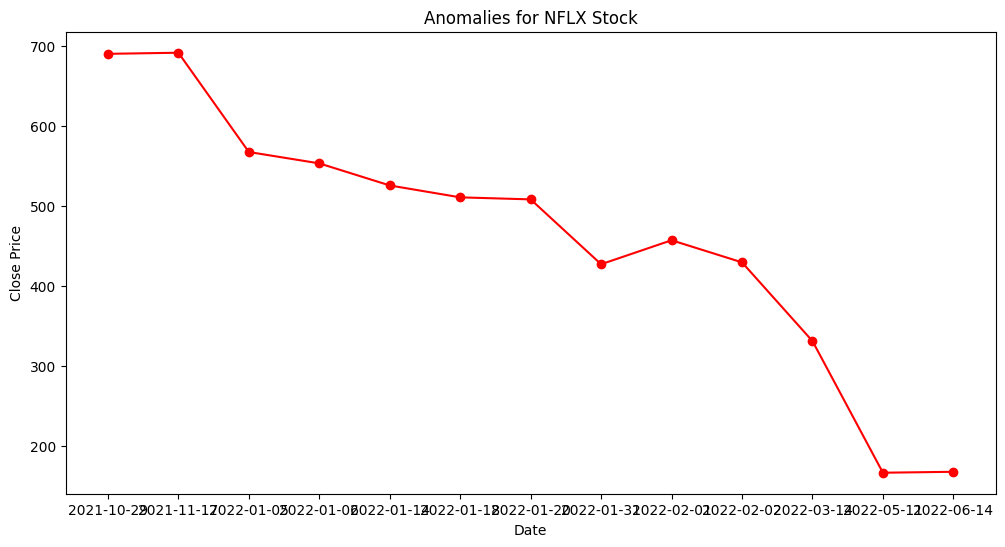



Anomalies for F stock:
Summary Statistics for F:
count    13.000000
mean     21.126154
std       4.803319
min      11.060000
25%      21.450001
50%      22.450001
75%      24.309999
max      25.190001
Name: Close Price, dtype: float64


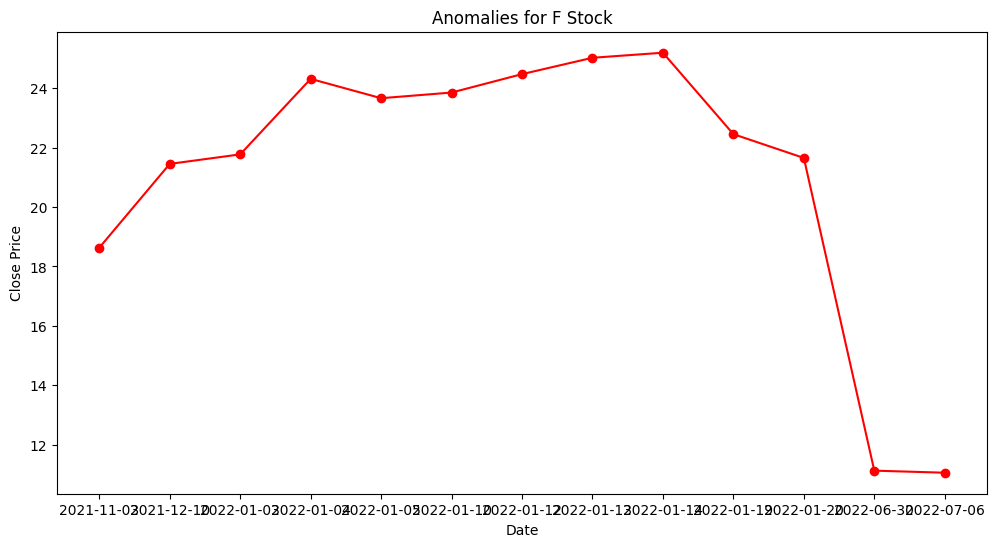



Anomalies for NIO stock:
Summary Statistics for NIO:
count    13.000000
mean     29.806154
std      14.141921
min      12.710000
25%      13.550000
50%      37.709999
75%      42.290001
max      43.200001
Name: Close Price, dtype: float64


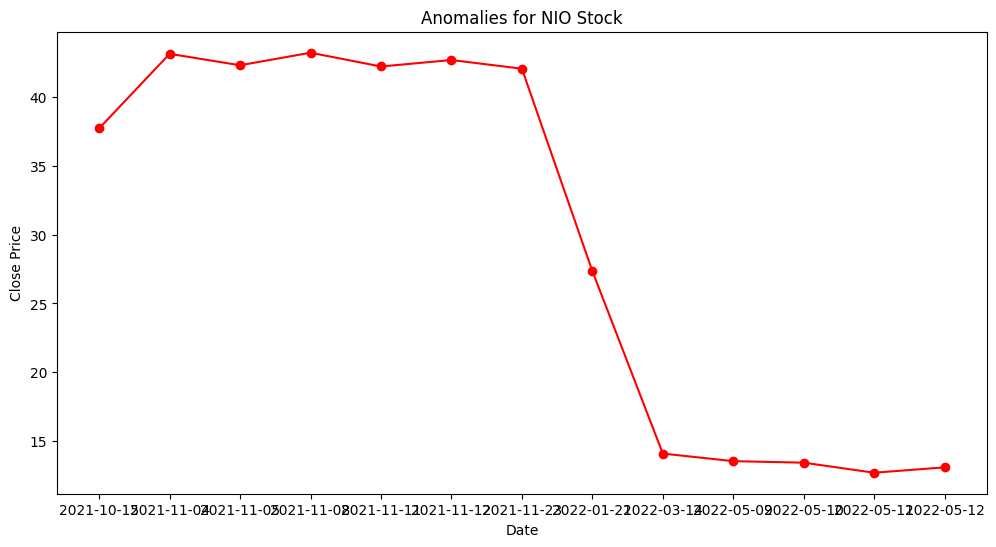



Anomalies for XPEV stock:
Summary Statistics for XPEV:
count    13.000000
mean     31.831538
std      19.867132
min      12.110000
25%      14.090000
50%      17.330000
75%      51.299999
max      55.000000
Name: Close Price, dtype: float64


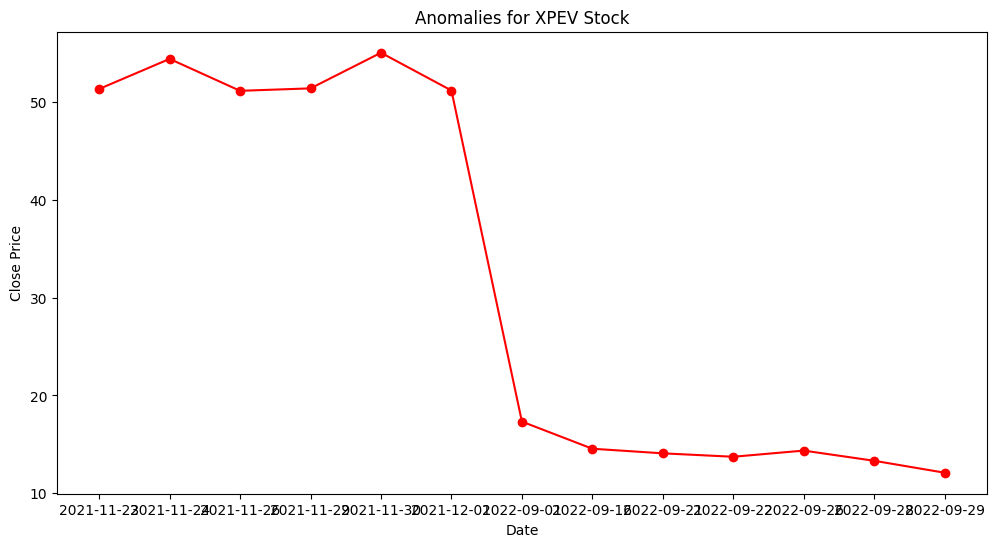

In [10]:
for stock_name, anomalies_data in anomalies_info.items():
    print(f'Anomalies for {stock_name} stock:')
    anomalies_df = pd.DataFrame(anomalies_data)
    
    # Calculate summary statistics for each stock's anomalies
    summary_stats = anomalies_df['Close Price'].describe()
    print(f'Summary Statistics for {stock_name}:')
    print(summary_stats)

    # Visualize anomalies for each stock
    plt.figure(figsize=(12, 6))
    plt.plot(anomalies_df['Date'], anomalies_df['Close Price'], marker='o', linestyle='-', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Anomalies for {stock_name} Stock')
    plt.show()

    print("\n")

In [12]:
import numpy as np

# Assuming 'Close' is the column you are analyzing
mean_close = data['Close'].mean()
std_close = data['Close'].std()

# Choose a multiplier based on your desired sensitivity to anomalies
threshold_multiplier = 2.5

# Set the threshold
threshold = mean_close + threshold_multiplier * std_close

# Create a binary column indicating anomalies
data['Ground_Truth_Labels_Column'] = (data['Close'] < threshold).astype(int)

In [13]:
data['Ground_Truth_Labels_Column']

0       1
1       1
2       1
3       1
4       1
       ..
4718    0
4719    0
4720    0
4721    0
4722    0
Name: Ground_Truth_Labels_Column, Length: 4723, dtype: int32